In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import re
import csv

In [7]:
training_essays = pd.read_csv('csvTraining.csv')

In [8]:
training_essays.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
score_map = {1:5, 2:10, 3:20, 4:20, 5:15, 6:15, 7:2.5, 8:1}

In [10]:
training_essays['score_map'] = training_essays['essay_set'].map(score_map)

In [11]:
training_essays.score_map.unique()

array([ 5. , 10. , 20. , 15. ,  2.5,  1. ])

In [12]:
training_essays["domain1_score"].head()

0     8
1     9
2     7
3    10
4     8
Name: domain1_score, dtype: int64

In [261]:
set_one = training_essays.iloc[0:1783]

In [262]:
set_one.tail()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
1778,1783,1,"Dear @CAPS1, @CAPS2 several reasons on way I t...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1779,1784,1,Do a adults and kids spend to much time on the...,3,4,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1780,1785,1,My opinion is that people should have computer...,4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1781,1786,1,"Dear readers, I think that its good and bad to...",1,1,NaN,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1782,1787,1,Dear - Local Newspaper I agree thats computers...,4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [263]:
set_one.describe()

,essay_id,essay_set,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,rater1_trait1,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
count,1783.000000,1783.0,1783.000000,1783.000000,0.0,1783.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,894.310151,1.0,4.260796,4.267527,NaN,8.528323,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,516.143993,0.0,0.842119,0.816287,NaN,1.538565,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.0,1.000000,1.000000,NaN,2.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,448.500000,1.0,4.000000,4.000000,NaN,8.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,894.000000,1.0,4.000000,4.000000,NaN,8.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1341.500000,1.0,5.000000,5.000000,NaN,10.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1787.000000,1.0,6.000000,6.000000,NaN,12.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [275]:
set_two = training_essays.iloc[1783:3583]

In [276]:
set_two.tail()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
3578,4773,2,The author is writting about taking books off ...,3,2,NaN,3,3.0,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3579,4774,2,"I do not think that materials, such as books, ...",3,3,NaN,3,3.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3580,4775,2,"Yes we should keep the books,music,movies,an m...",2,2,NaN,2,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3581,4776,2,"I do believe that book, magazines, music, mov...",3,4,NaN,3,4.0,3.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3582,4777,2,Different Then Everyone Else @CAPS1 do peo...,3,3,NaN,3,2.0,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [277]:
set_two.describe()

,essay_id,essay_set,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,rater1_trait1,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
count,1800.00000,1800.0,1800.000000,1800.000000,0.0,1800.000000,1800.000000,1800.000000,1800.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,3877.50000,2.0,3.415556,3.436667,NaN,3.415556,3.333889,3.330556,3.333889,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,519.75956,0.0,0.774512,0.775808,NaN,0.774512,0.729103,0.726807,0.729103,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2978.00000,2.0,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3427.75000,2.0,3.000000,3.000000,NaN,3.000000,3.000000,3.000000,3.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3877.50000,2.0,3.000000,3.000000,NaN,3.000000,3.000000,3.000000,3.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4327.25000,2.0,4.000000,4.000000,NaN,4.000000,4.000000,4.000000,4.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,4777.00000,2.0,6.000000,6.000000,NaN,6.000000,4.000000,4.000000,4.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [288]:
set_three = training_essays.iloc[3583:5309]

In [285]:
set_three.describe()

,essay_id,essay_set,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,rater1_trait1,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
count,1726.000000,1726.0,1726.000000,1726.000000,0.0,1726.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,6843.016222,3.0,1.741020,1.698725,NaN,1.848204,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,499.809908,0.0,0.777672,0.752710,NaN,0.815157,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,5978.000000,3.0,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,6410.250000,3.0,1.000000,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,6842.500000,3.0,2.000000,2.000000,NaN,2.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7275.750000,3.0,2.000000,2.000000,NaN,2.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,7708.000000,3.0,3.000000,3.000000,NaN,3.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [291]:
set_four = training_essays.iloc[5309:7079]

In [293]:
set_four.describe()

,essay_id,essay_set,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,rater1_trait1,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
count,1770.000000,1770.0,1770.000000,1770.000000,0.0,1770.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,9750.472881,4.0,1.320339,1.316384,NaN,1.432203,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,513.363495,0.0,0.879825,0.877076,NaN,0.939782,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,8863.000000,4.0,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,9306.250000,4.0,1.000000,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,9750.500000,4.0,1.000000,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,10194.750000,4.0,2.000000,2.000000,NaN,2.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,10642.000000,4.0,3.000000,3.000000,NaN,3.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [297]:
set_five = training_essays.iloc[7079:8884]

In [299]:
set_five.describe()

,essay_id,essay_set,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,rater1_trait1,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
count,1805.000000,1805.0,1805.000000,1805.000000,0.0,1805.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,12729.000000,5.0,2.221053,2.221607,NaN,2.408864,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,521.202936,0.0,0.988515,0.992030,NaN,0.970821,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,11827.000000,5.0,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,12278.000000,5.0,2.000000,2.000000,NaN,2.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,12729.000000,5.0,2.000000,2.000000,NaN,2.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,13180.000000,5.0,3.000000,3.000000,NaN,3.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,13631.000000,5.0,4.000000,4.000000,NaN,4.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [305]:
set_six = training_essays.iloc[8884:10684]

In [307]:
set_six.describe()

,essay_id,essay_set,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,rater1_trait1,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
count,1800.00000,1800.0,1800.000000,1800.000000,0.0,1800.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,15733.50000,6.0,2.561111,2.550000,NaN,2.72000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,519.75956,0.0,0.979296,0.977655,NaN,0.97063,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,14834.00000,6.0,0.000000,0.000000,NaN,0.00000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,15283.75000,6.0,2.000000,2.000000,NaN,2.00000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,15733.50000,6.0,3.000000,3.000000,NaN,3.00000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,16183.25000,6.0,3.000000,3.000000,NaN,3.00000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,16633.00000,6.0,4.000000,4.000000,NaN,4.00000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [311]:
set_seven = training_essays.iloc[10684:12253]

In [313]:
set_seven.describe()

,essay_id,essay_set,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,rater1_trait1,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
count,1569.000000,1569.0,1569.000000,1569.000000,0.0,1569.00000,0.0,0.0,0.0,1569.000000,...,1569.000000,1569.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,18705.326960,7.0,8.023582,8.038878,NaN,16.06246,NaN,NaN,NaN,1.837476,...,1.999363,2.165711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,498.542554,0.0,2.424120,2.517367,NaN,4.58535,NaN,NaN,NaN,0.862911,...,0.637377,0.692026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,17834.000000,7.0,0.000000,0.000000,NaN,2.00000,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,18273.000000,7.0,6.000000,6.000000,NaN,13.00000,NaN,NaN,NaN,1.000000,...,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,18712.000000,7.0,8.000000,8.000000,NaN,16.00000,NaN,NaN,NaN,2.000000,...,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,19139.000000,7.0,10.000000,10.000000,NaN,19.00000,NaN,NaN,NaN,2.000000,...,2.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,19563.000000,7.0,12.000000,12.000000,NaN,24.00000,NaN,NaN,NaN,3.000000,...,3.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [314]:
set_eight = training_essays.iloc[12253:12997]

In [317]:
set_eight.describe()

,essay_id,essay_set,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,rater1_trait1,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
count,723.000000,723.0,723.000000,723.000000,128.000000,723.000000,0.0,0.0,0.0,723.000000,...,723.000000,723.000000,723.000000,723.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,21168.485477,8.0,18.338866,18.557400,37.828125,36.950207,NaN,NaN,NaN,3.760719,...,4.016598,3.892116,3.777317,3.589212,3.945312,3.890625,4.078125,3.992188,3.843750,3.617188
std,262.931309,0.0,3.170147,3.170669,5.240829,5.753502,NaN,NaN,NaN,0.711602,...,0.686031,0.622284,0.689401,0.693256,0.643668,0.630390,0.622535,0.509687,0.538845,0.603417
min,20716.000000,8.0,5.000000,5.000000,20.000000,10.000000,NaN,NaN,NaN,1.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000
25%,20939.500000,8.0,16.000000,16.000000,36.000000,33.000000,NaN,NaN,NaN,3.000000,...,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000
50%,21163.000000,8.0,19.000000,19.000000,40.000000,37.000000,NaN,NaN,NaN,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,21395.500000,8.0,20.000000,20.000000,40.000000,40.000000,NaN,NaN,NaN,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,21633.000000,8.0,30.000000,30.000000,50.000000,60.000000,NaN,NaN,NaN,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,5.000000


In [13]:
training_essays.describe()

,essay_id,essay_set,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,rater1_trait1,...,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6,score_map
count,12976.000000,12976.000000,12976.000000,12976.000000,128.000000,12976.000000,1800.000000,1800.000000,1800.000000,2292.000000,...,2292.000000,723.000000,723.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,12976.000000
mean,10295.395808,4.179485,4.127158,4.137408,37.828125,6.800247,3.333889,3.330556,3.333889,2.444154,...,2.710297,3.777317,3.589212,3.945312,3.890625,4.078125,3.992188,3.843750,3.617188,11.987939
std,6309.074105,2.136913,4.212544,4.264330,5.240829,8.970705,0.729103,0.726807,0.729103,1.211730,...,1.045795,0.689401,0.693256,0.643668,0.630390,0.622535,0.509687,0.538845,0.603417,6.684981
min,1.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,1.000000
25%,4438.750000,2.000000,2.000000,2.000000,36.000000,2.000000,3.000000,3.000000,3.000000,2.000000,...,2.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000
50%,10044.500000,4.000000,3.000000,3.000000,40.000000,3.000000,3.000000,3.000000,3.000000,2.000000,...,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,15.000000
75%,15681.250000,6.000000,4.000000,4.000000,40.000000,8.000000,4.000000,4.000000,4.000000,3.000000,...,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,20.000000
max,21633.000000,8.000000,30.000000,30.000000,50.000000,60.000000,4.000000,4.000000,4.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,5.000000,20.000000


In [14]:
txt_only = training_essays[['essay']]

In [15]:
txt_only.head()

,essay
0,"Dear local newspaper, I think effects computer..."
1,"Dear @CAPS1 @CAPS2, I believe that using compu..."
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl..."
3,"Dear Local Newspaper, @CAPS1 I have found that..."
4,"Dear @LOCATION1, I know having computers has a..."


In [16]:
txt_only.to_csv('txt_only.csv')

In [17]:
words = txt_only['essay'].tolist()

In [18]:
words[0:1]

["Dear local newspaper, I think effects computers have on people are great learning skills/affects because they give us time to chat with friends/new people, helps us learn about the globe(astronomy) and keeps us out of troble! Thing about! Dont you think so? How would you feel if your teenager is always on the phone with friends! Do you ever time to chat with your friends or buisness partner about things. Well now - there's a new way to chat the computer, theirs plenty of sites on the internet to do so: @ORGANIZATION1, @ORGANIZATION2, @CAPS1, facebook, myspace ect. Just think now while your setting up meeting with your boss on the computer, your teenager is having fun on the phone not rushing to get off cause you want to use it. How did you learn about other countrys/states outside of yours? Well I have by computer/internet, it's a new way to learn about what going on in our time! You might think your child spends a lot of time on the computer, but ask them so question about the econo

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
vectorizer = TfidfVectorizer()

In [21]:
token_words = vectorizer.fit_transform(words)

In [22]:
print(vectorizer.get_feature_names())

['00', '000', '00pm', '046', '101st', '102', '102nd', '10535', '10536', '11', '12', '13', '15', '185', '190', '1920s', '1929', '1930', '1930s', '1931', '1937', '1956', '1961', '1961ö', '1970', '21', '250', '27', '30', '30am', '30pm', '35', '41', '45', '46', '51', '55', '85th', '_________', 'aa', 'aamerica', 'aamous', 'aand', 'aare', 'aas', 'aase', 'aasked', 'ab', 'aback', 'abad', 'abadond', 'abait', 'abalt', 'abanded', 'abandon', 'abandond', 'abandone', 'abandoned', 'abandoness', 'abandoning', 'abandonment', 'abandonned', 'abandured', 'abanodoned', 'abanoned', 'abat', 'abbandon', 'abbanond', 'abbreviated', 'abc', 'abd', 'abdomens', 'abdominal', 'abducted', 'abduction', 'abe', 'abease', 'abeast', 'abel', 'abenefit', 'abese', 'abesity', 'abetter', 'abhor', 'abhors', 'abide', 'abided', 'abig', 'abiity', 'abile', 'abilit', 'abilitie', 'abilities', 'ability', 'abilitys', 'abiliy', 'abiliyt', 'abillity', 'abillty', 'abilty', 'abl', 'ablaze', 'able', 'abled', 'ables', 'ablities', 'ablitiy', '

In [23]:
token_words.shape

(12976, 39819)

In [24]:
first_essay_vectors = token_words[0]

In [25]:
first_essay = pd.DataFrame(first_essay_vectors.T.todense(), index=vectorizer.get_feature_names(), columns=["tfidf"])

In [26]:
first_essay.sort_values(by=['tfidf'], ascending=False).head()

,tfidf
your,0.293779
computer,0.227800
you,0.224300
child,0.200466
chat,0.191268


In [27]:
words[0]

"Dear local newspaper, I think effects computers have on people are great learning skills/affects because they give us time to chat with friends/new people, helps us learn about the globe(astronomy) and keeps us out of troble! Thing about! Dont you think so? How would you feel if your teenager is always on the phone with friends! Do you ever time to chat with your friends or buisness partner about things. Well now - there's a new way to chat the computer, theirs plenty of sites on the internet to do so: @ORGANIZATION1, @ORGANIZATION2, @CAPS1, facebook, myspace ect. Just think now while your setting up meeting with your boss on the computer, your teenager is having fun on the phone not rushing to get off cause you want to use it. How did you learn about other countrys/states outside of yours? Well I have by computer/internet, it's a new way to learn about what going on in our time! You might think your child spends a lot of time on the computer, but ask them so question about the econom

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
cvec = CountVectorizer()

In [30]:
word_count = cvec.fit_transform(words)

In [31]:
word_count

<12976x39819 sparse matrix of type '<class 'numpy.int64'>'
	with 1399350 stored elements in Compressed Sparse Row format>

In [32]:
def get_top_words(words, n=None):
    sum_words = word_count.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [33]:
get_top_words(word_count)

[('the', 151347),
 ('to', 98850),
 ('and', 79598),
 ('of', 53455),
 ('that', 50835),
 ('in', 43941),
 ('it', 39566),
 ('is', 38122),
 ('you', 32462),
 ('was', 31267),
 ('they', 25392),
 ('be', 25213),
 ('for', 24872),
 ('on', 24305),
 ('have', 20989),
 ('people', 20932),
 ('are', 20792),
 ('with', 19363),
 ('my', 18933),
 ('we', 18585),
 ('not', 17850),
 ('this', 17472),
 ('or', 16275),
 ('can', 15799),
 ('he', 15678),
 ('because', 14511),
 ('so', 14224),
 ('would', 14155),
 ('there', 14049),
 ('if', 13812),
 ('but', 13307),
 ('when', 12948),
 ('all', 12841),
 ('about', 12186),
 ('she', 11443),
 ('caps1', 11414),
 ('as', 11327),
 ('at', 11054),
 ('computers', 10696),
 ('had', 10642),
 ('what', 10230),
 ('like', 10194),
 ('do', 10147),
 ('their', 9939),
 ('from', 9857),
 ('one', 9845),
 ('time', 9563),
 ('computer', 9391),
 ('just', 9271),
 ('were', 9222),
 ('out', 9214),
 ('get', 9094),
 ('her', 9080),
 ('his', 8915),
 ('them', 8877),
 ('will', 8578),
 ('up', 8473),
 ('should', 8457),


In [34]:
from nltk.corpus import stopwords

In [35]:
stop = stopwords.words('english')

In [36]:
txt_only['stopwords'] = txt_only['essay'].apply(lambda x: len([x for x in x.split() if x in stop]))
txt_only[['essay','stopwords']].head()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,essay,stopwords
0,"Dear local newspaper, I think effects computer...",157
1,"Dear @CAPS1 @CAPS2, I believe that using compu...",175
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",129
3,"Dear Local Newspaper, @CAPS1 I have found that...",207
4,"Dear @LOCATION1, I know having computers has a...",211


In [37]:
stop_count = txt_only[['essay','stopwords']]

In [38]:
stop_count.head()

,essay,stopwords
0,"Dear local newspaper, I think effects computer...",157
1,"Dear @CAPS1 @CAPS2, I believe that using compu...",175
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",129
3,"Dear Local Newspaper, @CAPS1 I have found that...",207
4,"Dear @LOCATION1, I know having computers has a...",211


In [39]:
des_stop = stop_count.sort_values('stopwords', ascending=False)

In [40]:
des_stop.head()

,essay,stopwords
2380,Censorhship should play a major part in which ...,529
2148,"Katherine Paterson once said, 'All of us can t...",516
2011,"Have you ever found or seen books, music, movi...",505
3059,"Dear @CAPS1, @CAPS2 I have found that ther...",489
1934,"Just because I agree with something, do you ha...",477


In [41]:
stop_count['word_count'] = stop_count['essay'].apply(lambda x: len(str(x).split(" ")))

In [42]:
total_count = stop_count[['essay','stopwords', 'word_count']]

In [43]:
total_count.sort_values('word_count', ascending=False).head()

,essay,stopwords,word_count
3022,Censorship is the most foul and terrifying par...,449,1119
1878,What are we hiding from? Is personal expressio...,474,1082
3222,In our society today there is an enormous amou...,475,1032
2380,Censorhship should play a major part in which ...,529,1004
2148,"Katherine Paterson once said, 'All of us can t...",516,1002


In [44]:
def avg_word(essay):
  wrdz = essay.split()
  return (sum(len(wrd) for wrd in wrdz)/len(wrdz))

In [45]:
total_count['avg_word'] = total_count['essay'].apply(lambda x: avg_word(x))

In [46]:
from spellchecker import SpellChecker

In [47]:
total_count.head()

,essay,stopwords,word_count,avg_word
0,"Dear local newspaper, I think effects computer...",157,338,4.550296
1,"Dear @CAPS1 @CAPS2, I believe that using compu...",175,419,4.463007
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",129,279,4.526882
3,"Dear Local Newspaper, @CAPS1 I have found that...",207,524,5.041985
4,"Dear @LOCATION1, I know having computers has a...",211,465,4.526882


In [48]:
def spell_count(essay):
    spell = SpellChecker()
    essay=essay.split()
    misspelled = spell.unknown(essay)
    return len(misspelled)

In [49]:
total_count['mispelled'] = total_count['essay'].apply(lambda x: spell_count(x))

In [50]:
total_count.head()

,essay,stopwords,word_count,avg_word,mispelled
0,"Dear local newspaper, I think effects computer...",157,338,4.550296,44
1,"Dear @CAPS1 @CAPS2, I believe that using compu...",175,419,4.463007,42
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",129,279,4.526882,27
3,"Dear Local Newspaper, @CAPS1 I have found that...",207,524,5.041985,78
4,"Dear @LOCATION1, I know having computers has a...",211,465,4.526882,47


In [51]:
total_count.to_csv('total_count.csv')

In [52]:
# grammar error count?

In [53]:
# total_count

In [54]:
import nltk

In [55]:
import string

In [56]:
from nltk import word_tokenize

In [57]:
from nltk import punkt

In [58]:
total_count['cleaned'] = total_count['essay'].apply(lambda x:''.join([i for i in x if i not in string.punctuation]))

In [59]:
total_count.head()

,essay,stopwords,word_count,avg_word,mispelled,cleaned
0,"Dear local newspaper, I think effects computer...",157,338,4.550296,44,Dear local newspaper I think effects computers...
1,"Dear @CAPS1 @CAPS2, I believe that using compu...",175,419,4.463007,42,Dear CAPS1 CAPS2 I believe that using computer...
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",129,279,4.526882,27,Dear CAPS1 CAPS2 CAPS3 More and more people us...
3,"Dear Local Newspaper, @CAPS1 I have found that...",207,524,5.041985,78,Dear Local Newspaper CAPS1 I have found that m...
4,"Dear @LOCATION1, I know having computers has a...",211,465,4.526882,47,Dear LOCATION1 I know having computers has a p...


In [60]:
total_count['token'] = total_count.apply(lambda row: 
    nltk.word_tokenize(row['cleaned']), axis=1)

In [61]:
total_count.head()

,essay,stopwords,word_count,avg_word,mispelled,cleaned,token
0,"Dear local newspaper, I think effects computer...",157,338,4.550296,44,Dear local newspaper I think effects computers...,"[Dear, local, newspaper, I, think, effects, co..."
1,"Dear @CAPS1 @CAPS2, I believe that using compu...",175,419,4.463007,42,Dear CAPS1 CAPS2 I believe that using computer...,"[Dear, CAPS1, CAPS2, I, believe, that, using, ..."
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",129,279,4.526882,27,Dear CAPS1 CAPS2 CAPS3 More and more people us...,"[Dear, CAPS1, CAPS2, CAPS3, More, and, more, p..."
3,"Dear Local Newspaper, @CAPS1 I have found that...",207,524,5.041985,78,Dear Local Newspaper CAPS1 I have found that m...,"[Dear, Local, Newspaper, CAPS1, I, have, found..."
4,"Dear @LOCATION1, I know having computers has a...",211,465,4.526882,47,Dear LOCATION1 I know having computers has a p...,"[Dear, LOCATION1, I, know, having, computers, ..."


In [62]:
from nltk.collocations import *

In [63]:
bigram_measures = nltk.collocations.BigramAssocMeasures()

In [64]:
all_words = total_count.token.sum()

In [65]:
from nltk.probability import FreqDist

In [66]:
stopwords_list = stopwords.words('english')

In [67]:
stopwords_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [68]:
all_words = [word for word in all_words if word not in stopwords_list]

In [69]:
all_words

['Dear',
 'local',
 'newspaper',
 'I',
 'think',
 'effects',
 'computers',
 'people',
 'great',
 'learning',
 'skillsaffects',
 'give',
 'us',
 'time',
 'chat',
 'friendsnew',
 'people',
 'helps',
 'us',
 'learn',
 'globeastronomy',
 'keeps',
 'us',
 'troble',
 'Thing',
 'Dont',
 'think',
 'How',
 'would',
 'feel',
 'teenager',
 'always',
 'phone',
 'friends',
 'Do',
 'ever',
 'time',
 'chat',
 'friends',
 'buisness',
 'partner',
 'things',
 'Well',
 'theres',
 'new',
 'way',
 'chat',
 'computer',
 'plenty',
 'sites',
 'internet',
 'ORGANIZATION1',
 'ORGANIZATION2',
 'CAPS1',
 'facebook',
 'myspace',
 'ect',
 'Just',
 'think',
 'setting',
 'meeting',
 'boss',
 'computer',
 'teenager',
 'fun',
 'phone',
 'rushing',
 'get',
 'cause',
 'want',
 'use',
 'How',
 'learn',
 'countrysstates',
 'outside',
 'Well',
 'I',
 'computerinternet',
 'new',
 'way',
 'learn',
 'going',
 'time',
 'You',
 'might',
 'think',
 'child',
 'spends',
 'lot',
 'time',
 'computer',
 'ask',
 'question',
 'economy',

In [70]:
all_words_freqdist = FreqDist(all_words)

In [71]:
all_words_freqdist.most_common(10)

[('I', 45303),
 ('people', 19156),
 ('The', 18117),
 ('would', 13936),
 ('CAPS1', 10692),
 ('like', 9702),
 ('time', 9462),
 ('computer', 9174),
 ('get', 9034),
 ('computers', 8497)]

In [72]:
bigram_measures = nltk.collocations.BigramAssocMeasures()

In [73]:
bigram_finder = BigramCollocationFinder.from_words(all_words)

In [74]:
bigram_scored = bigram_finder.score_ngrams(bigram_measures.raw_freq)

In [75]:
bigram_scored[:10]

[(('I', 'think'), 0.002370261798618714),
 (('Empire', 'State'), 0.001869944375721088),
 (('State', 'Building'), 0.001431125637328164),
 (('The', 'author'), 0.0012075522947016962),
 (('mooring', 'mast'), 0.0010301029654537547),
 (('I', 'believe'), 0.0010057597361706435),
 (('For', 'example'), 0.000907105596444351),
 (('I', 'would'), 0.0008161387922811464),
 (('time', 'I'), 0.0008046077889365148),
 (('dirigibles', 'dock'), 0.000772577224090316)]

In [76]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()

In [77]:
trigram_finder = TrigramCollocationFinder.from_words(all_words)

In [78]:
trigram_scored = trigram_finder.score_ngrams(trigram_measures.raw_freq)

In [79]:
trigram_scored[:10]

[(('Empire', 'State', 'Building'), 0.0014183134113896845),
 (('allow', 'dirigibles', 'dock'), 0.0006015340078116141),
 (('builders', 'Empire', 'State'), 0.000577831389825427),
 (('author', 'concludes', 'story'), 0.00048302091788067844),
 (('attempting', 'allow', 'dirigibles'), 0.0004516309643314036),
 (('State', 'Building', 'faced'), 0.00043881873839292406),
 (('low', 'urban', 'areas'), 0.00038116372166976616),
 (('The', 'author', 'concludes'), 0.00036450782794974275),
 (('The', 'features', 'setting'), 0.00035169560201126323),
 (('mood', 'created', 'author'), 0.0003459301003389474)]

In [80]:
# GET COUNT OF PROPER NOUNS THEN DROP

In [81]:
import re

prop_nouns = re.findall(r'\b[A-Z]*\d\b', total_count['cleaned'][1])
prop_nouns

['CAPS1',
 'CAPS2',
 'NUM1',
 'MONTH1',
 'LOCATION1',
 'LOCATION3',
 'LOCATION2',
 'NUM1',
 'NUM3',
 'NUM3']

In [82]:
len(prop_nouns)

10

In [83]:
def prop_count(cleaned):
    prop_nouns = re.findall(r'\b[A-Z]*\d\b', cleaned)
    return len(prop_nouns)


In [84]:
total_count['props'] = total_count['cleaned'].apply(lambda x: prop_count(x))

In [85]:
total_count.head()

,essay,stopwords,word_count,avg_word,mispelled,cleaned,token,props
0,"Dear local newspaper, I think effects computer...",157,338,4.550296,44,Dear local newspaper I think effects computers...,"[Dear, local, newspaper, I, think, effects, co...",4
1,"Dear @CAPS1 @CAPS2, I believe that using compu...",175,419,4.463007,42,Dear CAPS1 CAPS2 I believe that using computer...,"[Dear, CAPS1, CAPS2, I, believe, that, using, ...",10
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",129,279,4.526882,27,Dear CAPS1 CAPS2 CAPS3 More and more people us...,"[Dear, CAPS1, CAPS2, CAPS3, More, and, more, p...",7
3,"Dear Local Newspaper, @CAPS1 I have found that...",207,524,5.041985,78,Dear Local Newspaper CAPS1 I have found that m...,"[Dear, Local, Newspaper, CAPS1, I, have, found...",40
4,"Dear @LOCATION1, I know having computers has a...",211,465,4.526882,47,Dear LOCATION1 I know having computers has a p...,"[Dear, LOCATION1, I, know, having, computers, ...",4


In [86]:
total_count.describe()

,stopwords,word_count,avg_word,mispelled,props
count,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000
mean,99.846255,226.744143,4.438479,25.539843,4.399584
std,81.166996,180.022841,0.382159,20.879863,7.966941
min,0.000000,2.000000,2.928571,0.000000,0.000000
25%,44.000000,99.000000,4.207958,11.000000,0.000000
50%,71.000000,164.000000,4.451220,20.000000,1.000000
75%,138.000000,316.000000,4.691240,34.000000,5.000000
max,529.000000,1119.000000,17.120000,181.000000,113.000000


In [87]:
total_count.shape

(12976, 8)

In [88]:
total_count['grade'] = training_essays['score_map']*training_essays['domain1_score']

In [89]:
total_count.tail()

,essay,stopwords,word_count,avg_word,mispelled,cleaned,token,props,grade
12971,In most stories mothers and daughters are eith...,368,847,4.274556,100,In most stories mothers and daughters are eith...,"[In, most, stories, mothers, and, daughters, a...",28,35.0
12972,I never understood the meaning laughter is the...,243,547,4.155678,79,I never understood the meaning laughter is the...,"[I, never, understood, the, meaning, laughter,...",31,32.0
12973,"When you laugh, is @CAPS5 out of habit, or is ...",360,817,4.626683,115,When you laugh is CAPS5 out of habit or is CAP...,"[When, you, laugh, is, CAPS5, out, of, habit, ...",55,40.0
12974,"Trippin' on fences I am @NUM1 years young, and...",241,563,4.434164,83,Trippin on fences I am NUM1 years young and in...,"[Trippin, on, fences, I, am, NUM1, years, youn...",19,40.0
12975,Many people believe that laughter can improve ...,198,467,4.408994,52,Many people believe that laughter can improve ...,"[Many, people, believe, that, laughter, can, i...",7,40.0


In [90]:
total_count['percentage_grade'] = total_count['grade']/60 

In [91]:
total_count.describe()

,stopwords,word_count,avg_word,mispelled,props,grade,percentage_grade
count,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000
mean,99.846255,226.744143,4.438479,25.539843,4.399584,37.021424,0.617024
std,81.166996,180.022841,0.382159,20.879863,7.966941,13.959867,0.232664
min,0.000000,2.000000,2.928571,0.000000,0.000000,0.000000,0.000000
25%,44.000000,99.000000,4.207958,11.000000,0.000000,30.000000,0.500000
50%,71.000000,164.000000,4.451220,20.000000,1.000000,40.000000,0.666667
75%,138.000000,316.000000,4.691240,34.000000,5.000000,45.000000,0.750000
max,529.000000,1119.000000,17.120000,181.000000,113.000000,60.000000,1.000000


In [92]:
total_count.drop(['grade'], axis=1, inplace=True)

In [93]:
total_count.head()

,essay,stopwords,word_count,avg_word,mispelled,cleaned,token,props,percentage_grade
0,"Dear local newspaper, I think effects computer...",157,338,4.550296,44,Dear local newspaper I think effects computers...,"[Dear, local, newspaper, I, think, effects, co...",4,0.666667
1,"Dear @CAPS1 @CAPS2, I believe that using compu...",175,419,4.463007,42,Dear CAPS1 CAPS2 I believe that using computer...,"[Dear, CAPS1, CAPS2, I, believe, that, using, ...",10,0.750000
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",129,279,4.526882,27,Dear CAPS1 CAPS2 CAPS3 More and more people us...,"[Dear, CAPS1, CAPS2, CAPS3, More, and, more, p...",7,0.583333
3,"Dear Local Newspaper, @CAPS1 I have found that...",207,524,5.041985,78,Dear Local Newspaper CAPS1 I have found that m...,"[Dear, Local, Newspaper, CAPS1, I, have, found...",40,0.833333
4,"Dear @LOCATION1, I know having computers has a...",211,465,4.526882,47,Dear LOCATION1 I know having computers has a p...,"[Dear, LOCATION1, I, know, having, computers, ...",4,0.666667


In [100]:
regress_test = total_count[['percentage_grade','stopwords', 'word_count', 'mispelled', 'avg_word', 'props', 'punct', 'words_per_sent']]

In [101]:
regress_test.head()

,percentage_grade,stopwords,word_count,mispelled,avg_word,props,punct,words_per_sent
0,0.666667,157,338,44,4.550296,4,37,30.727273
1,0.750000,175,419,42,4.463007,10,33,22.052632
2,0.583333,129,279,27,4.526882,7,23,18.600000
3,0.833333,207,524,78,5.041985,40,46,21.000000
4,0.666667,211,465,47,4.526882,4,45,15.000000


In [102]:
from sklearn.linear_model import LinearRegression

In [103]:
X = regress_test.drop(['percentage_grade'],axis=1)
y = regress_test['percentage_grade']

In [104]:
X.head()

,stopwords,word_count,mispelled,avg_word,props,punct,words_per_sent
0,157,338,44,4.550296,4,37,30.727273
1,175,419,42,4.463007,10,33,22.052632
2,129,279,27,4.526882,7,23,18.600000
3,207,524,78,5.041985,40,46,21.000000
4,211,465,47,4.526882,4,45,15.000000


In [105]:
y.head()

0    0.666667
1    0.750000
2    0.583333
3    0.833333
4    0.666667
Name: percentage_grade, dtype: float64

In [106]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=33)

In [107]:
linmodel = LinearRegression()

In [108]:
linmodel.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [109]:
linmodel.score(x_train, y_train)

0.20741171259819413

In [110]:
regress_test.corr()

,percentage_grade,stopwords,word_count,mispelled,avg_word,props,punct,words_per_sent
percentage_grade,1.000000,0.292058,0.325970,0.395473,0.223768,0.200251,0.360593,0.023335
stopwords,0.292058,1.000000,0.986014,0.841487,-0.030438,0.567704,0.798910,0.213244
word_count,0.325970,0.986014,1.000000,0.891248,0.021871,0.617706,0.847215,0.172207
mispelled,0.395473,0.841487,0.891248,1.000000,0.144084,0.711223,0.923769,0.049398
avg_word,0.223768,-0.030438,0.021871,0.144084,1.000000,0.024357,0.219670,-0.133855
props,0.200251,0.567704,0.617706,0.711223,0.024357,1.000000,0.636369,0.052018
punct,0.360593,0.798910,0.847215,0.923769,0.219670,0.636369,1.000000,-0.010023
words_per_sent,0.023335,0.213244,0.172207,0.049398,-0.133855,0.052018,-0.010023,1.000000


In [111]:
linmodel.fit(x_test,y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [112]:
linmodel.score(x_test, y_test)

0.18371922654948736

In [113]:
linmodel.coef_

array([-0.00165145,  0.00071648,  0.00614382,  0.07445085, -0.00423364,
       -0.00100569,  0.00127501])

In [114]:
regress_test.corr() > .4

,percentage_grade,stopwords,word_count,mispelled,avg_word,props,punct,words_per_sent
percentage_grade,True,False,False,False,False,False,False,False
stopwords,False,True,True,True,False,True,True,False
word_count,False,True,True,True,False,True,True,False
mispelled,False,True,True,True,False,True,True,False
avg_word,False,False,False,False,True,False,False,False
props,False,True,True,True,False,True,True,False
punct,False,True,True,True,False,True,True,False
words_per_sent,False,False,False,False,False,False,False,True


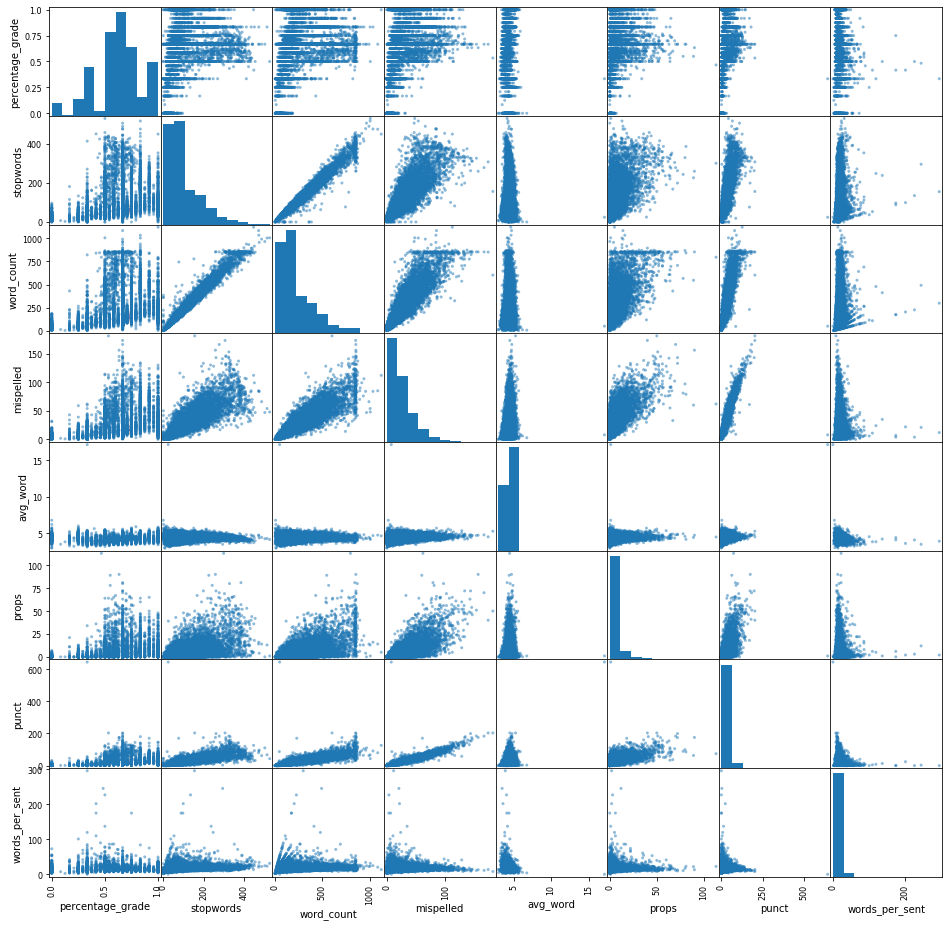

In [115]:
pd.plotting.scatter_matrix(regress_test,figsize=(16,16));

In [116]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [117]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       percentage_grade   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                          1.680e+04
Date:                Wed, 04 Dec 2019   Prob (F-statistic):                        0.00
Time:                        09:36:39   Log-Likelihood:                          1973.7
No. Observations:               12976   AIC:                                     -3933.
Df Residuals:                   12969   BIC:                                     -3881.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
stopwords         -0.0012      0.000     -7.649      0.000      -0.002      -0.001
word_count         0.0006   8.51e-05      6.576      0.000       0.000       0.001
mispelled          0.0066      0.000     21.995      0.000       0.006       0.007
avg_word           0.1078      0.001     99.314      0.000       0.106       0.110
props             -0.0046      0.000    -13.835      0.000      -0.005      -0.004
punct             -0.0016      0.000     -7.077      0.000      -0.002      -0.001
words_per_sent     0.0013      0.000      5.310      0.000       0.001       0.002
==============================================================================
Omnibus:                       35.858   Durbin-Watson:                   1.765
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.235
Skew:                          -0.122   Prob(JB):                     1.35e-08
Kurtosis:                       3.084   Cond. No.                         194.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
def punc_count(essay):
    punctuation = re.findall('[.,?!\";:-]', essay)
    return len(punctuation)

In [96]:
total_count['punct'] = total_count['essay'].apply(lambda x: punc_count(x))

In [118]:
y_pred = linmodel.predict(x_test)

In [121]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

0.2068575180387675

In [120]:
from sklearn import metrics

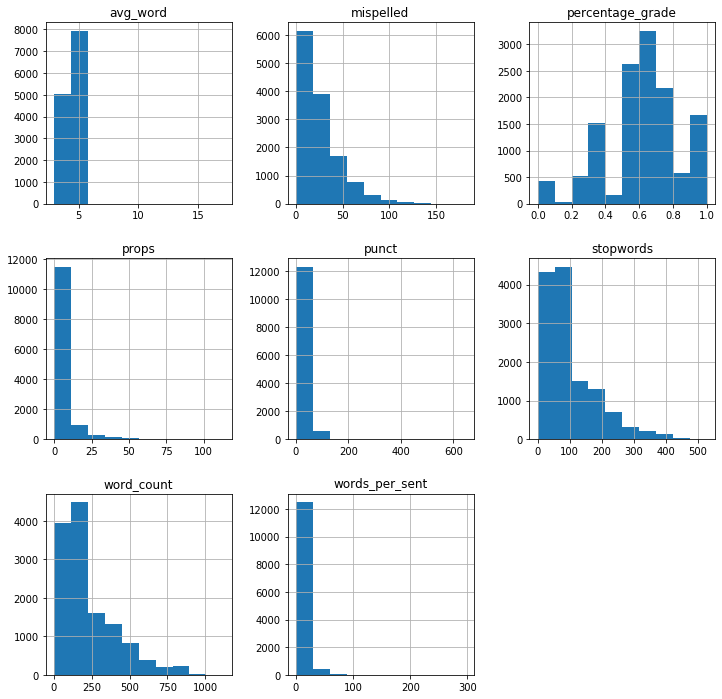

In [117]:
regress_test.hist(figsize=(12,12));

In [122]:
from sklearn.feature_selection import RFE

selector = RFE(linmodel, n_features_to_select=6)
selector = selector.fit(x_test,y_test)

In [123]:
selector.ranking_

array([1, 2, 1, 1, 1, 1, 1])

In [124]:
x_test.columns

Index(['stopwords', 'word_count', 'mispelled', 'avg_word', 'props', 'punct',
       'words_per_sent'],
      dtype='object')

In [125]:
def avg_sent_length(essay):
    sents=essay.split('.')
    return sum(len(x.split()) for x in sents) / len(sents)

In [98]:
total_count['words_per_sent'] = total_count['essay'].apply(lambda x: avg_sent_length(x))

In [126]:
total_count.head()

,essay,stopwords,word_count,avg_word,mispelled,cleaned,token,props,percentage_grade,punct,words_per_sent
0,"Dear local newspaper, I think effects computer...",157,338,4.550296,44,Dear local newspaper I think effects computers...,"[Dear, local, newspaper, I, think, effects, co...",4,0.666667,37,30.727273
1,"Dear @CAPS1 @CAPS2, I believe that using compu...",175,419,4.463007,42,Dear CAPS1 CAPS2 I believe that using computer...,"[Dear, CAPS1, CAPS2, I, believe, that, using, ...",10,0.750000,33,22.052632
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",129,279,4.526882,27,Dear CAPS1 CAPS2 CAPS3 More and more people us...,"[Dear, CAPS1, CAPS2, CAPS3, More, and, more, p...",7,0.583333,23,18.600000
3,"Dear Local Newspaper, @CAPS1 I have found that...",207,524,5.041985,78,Dear Local Newspaper CAPS1 I have found that m...,"[Dear, Local, Newspaper, CAPS1, I, have, found...",40,0.833333,46,21.000000
4,"Dear @LOCATION1, I know having computers has a...",211,465,4.526882,47,Dear LOCATION1 I know having computers has a p...,"[Dear, LOCATION1, I, know, having, computers, ...",4,0.666667,45,15.000000


In [127]:
total_count.to_csv('total_count.csv')

In [128]:
feature_names = cvec.get_feature_names()

In [129]:
word_matrix = pd.DataFrame(token_words.toarray(), columns=feature_names)

In [130]:
word_matrix.head()

,00,000,00pm,046,101st,102,102nd,10535,10536,11,...,öand,öbut,öin,öitís,öour,öthen,öwhen,öyouödoing,öî,öîto
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [131]:
get_top_words(token_words)

[('the', 151347),
 ('to', 98850),
 ('and', 79598),
 ('of', 53455),
 ('that', 50835),
 ('in', 43941),
 ('it', 39566),
 ('is', 38122),
 ('you', 32462),
 ('was', 31267),
 ('they', 25392),
 ('be', 25213),
 ('for', 24872),
 ('on', 24305),
 ('have', 20989),
 ('people', 20932),
 ('are', 20792),
 ('with', 19363),
 ('my', 18933),
 ('we', 18585),
 ('not', 17850),
 ('this', 17472),
 ('or', 16275),
 ('can', 15799),
 ('he', 15678),
 ('because', 14511),
 ('so', 14224),
 ('would', 14155),
 ('there', 14049),
 ('if', 13812),
 ('but', 13307),
 ('when', 12948),
 ('all', 12841),
 ('about', 12186),
 ('she', 11443),
 ('caps1', 11414),
 ('as', 11327),
 ('at', 11054),
 ('computers', 10696),
 ('had', 10642),
 ('what', 10230),
 ('like', 10194),
 ('do', 10147),
 ('their', 9939),
 ('from', 9857),
 ('one', 9845),
 ('time', 9563),
 ('computer', 9391),
 ('just', 9271),
 ('were', 9222),
 ('out', 9214),
 ('get', 9094),
 ('her', 9080),
 ('his', 8915),
 ('them', 8877),
 ('will', 8578),
 ('up', 8473),
 ('should', 8457),


In [132]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [133]:
thin_word_matrix = word_matrix[word_matrix.columns[word_matrix.sum() > 3.4]]

In [134]:
thin_word_matrix.shape

(12976, 3074)

In [135]:
thin_word_matrix.drop(['1937', 'caps1', 'caps2', 'caps3', 'caps4', 'caps5',
                                             'caps6', 'caps7', 'caps8', 'caps9', 'caps10',
                                             'caps11', 'caps12', 'caps13', 'caps14', 'caps15',
                                             'num1', 'num2', 'num3', 'num4', 'num5',
                                             'location1', 'location2', 'location3',
                                             'month1'],axis=1, inplace=True)

//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [136]:
thin_word_matrix.drop(['organization1', 'organization2', 'person1',
                                             'person2', 'person3', 'person4',
                                             ],axis=1, inplace=True)

In [137]:
thin_word_matrix.shape

(12976, 3043)

In [138]:
thin_word_matrix.head()

,102,12,1930,1956,1961,1970,250,55,abandoned,abhor,...,ìthe,ìthen,ìthere,ìthis,ìtownî,ìwhen,ìwide,ìwinter,ìyou,íí
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [139]:
big_df = regress_test.join(thin_word_matrix)

In [140]:
big_df.head()

,percentage_grade,stopwords,word_count,mispelled,avg_word,props,punct,words_per_sent,102,12,...,ìthe,ìthen,ìthere,ìthis,ìtownî,ìwhen,ìwide,ìwinter,ìyou,íí
0,0.666667,157,338,44,4.550296,4,37,30.727273,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.750000,175,419,42,4.463007,10,33,22.052632,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.583333,129,279,27,4.526882,7,23,18.600000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.833333,207,524,78,5.041985,40,46,21.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.666667,211,465,47,4.526882,4,45,15.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [141]:
big_df.shape

(12976, 3051)

In [142]:
big_df.describe()

,percentage_grade,stopwords,word_count,mispelled,avg_word,props,punct,words_per_sent,102,12,...,ìthe,ìthen,ìthere,ìthis,ìtownî,ìwhen,ìwide,ìwinter,ìyou,íí
count,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000,...,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000
mean,0.617024,99.846255,226.744143,25.539843,4.438479,4.399584,23.160142,17.241437,0.000311,0.000359,...,0.001632,0.000369,0.000503,0.000433,0.000318,0.001727,0.000284,0.001805,0.000275,0.000311
std,0.232664,81.166996,180.022841,20.879863,0.382159,7.966941,21.885291,8.193127,0.006819,0.006976,...,0.013651,0.007955,0.008612,0.007495,0.006514,0.014735,0.006730,0.015343,0.005769,0.008748
min,0.000000,0.000000,2.000000,0.000000,2.928571,0.000000,0.000000,0.077760,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,44.000000,99.000000,11.000000,4.207958,0.000000,8.000000,13.186779,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.666667,71.000000,164.000000,20.000000,4.451220,1.000000,17.000000,16.100000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.750000,138.000000,316.000000,34.000000,4.691240,5.000000,31.000000,19.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,529.000000,1119.000000,181.000000,17.120000,113.000000,644.000000,296.000000,0.226900,0.240184,...,0.244438,0.290679,0.232066,0.313067,0.276484,0.234707,0.286272,0.324081,0.264134,0.479573


In [143]:
X = big_df.drop(['percentage_grade'],axis=1)
y = big_df['percentage_grade']

In [144]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=33)

In [145]:
linmodel.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [146]:
linmodel.fit(x_test,y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [147]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       percentage_grade   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                              83.61
Date:                Wed, 04 Dec 2019   Prob (F-statistic):                        0.00
Time:                        09:47:18   Log-Likelihood:                          8299.7
No. Observations:               12976   AIC:                                 -1.050e+04
Df Residuals:                    9926   BIC:                                  1.229e+04
Df Model:                        3050                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
stopwords         -0.0009      0.000     -5.341      0.000      -0.001      -0.001
word_count         0.0004   8.27e-05      5.135      0.000       0.000       0.001
mispelled          0.0033      0.000     11.984      0.000       0.003       0.004
avg_word           0.0206      0.002      9.187      0.000       0.016       0.025
props             -0.0012      0.000     -3.669      0.000      -0.002      -0.001
punct             -0.0006      0.000     -3.492      0.000      -0.001      -0.000
words_per_sent     0.0003      0.000      1.381      0.167      -0.000       0.001
102                0.1384      0.277      0.499      0.618      -0.405       0.682
12                 0.1695      0.394      0.430      0.667      -0.602       0.941
1930              -0.5783      0.253     -2.285      0.022      -1.074      -0.082
1956              -0.4433      0.222     -1.998      0.046      -0.878      -0.008
1961               0.1533      0.241      0.636      0.525      -0.319       0.626
1970              -0.3422      0.225     -1.519      0.129      -0.784       0.099
250               -0.1832      0.218     -0.840      0.401      -0.611       0.244
55                 0.3760      0.288      1.307      0.191      -0.188       0.940
abandoned          0.3216      0.112      2.878      0.004       0.103       0.541
abhor              0.2332      0.440      0.529      0.597      -0.630       1.097
ability            0.2383      0.124      1.919      0.055      -0.005       0.482
able               0.1286      0.075      1.708      0.088      -0.019       0.276
about             -0.0268      0.058     -0.461      0.645      -0.141       0.087
above              0.0015      0.115      0.013      0.990      -0.224       0.227
absolutely        -0.1218      0.262     -0.465      0.642      -0.635       0.391
abuse             -0.2244      0.287     -0.781      0.435      -0.787       0.338
accept            -0.0852      0.162     -0.526      0.599      -0.403       0.232
acceptable         0.0826      0.283      0.292      0.771      -0.473       0.638
accepting          0.3370      0.229      1.472      0.141      -0.112       0.786
access             0.0868      0.149      0.584      0.559      -0.205       0.378
accident          -0.1292      0.136     -0.953      0.341      -0.395       0.137
accidents          0.2566      0.234      1.098      0.272      -0.202       0.715
accommodate        0.2200      0.180      1.219      0.223      -0.134       0.574
accomplish         0.0813      0.199      0.408      0.683      -0.309       0.471
according          0.1500      0.140      1.074      0.283      -0.124       0.424
account            0.1908      0.209      0.913      0.361      -0.219       0.

In [156]:
y_pred = linmodel.predict(x_test)

In [157]:
linmodel.score(x_test, y_test)

0.9035080963609239

In [158]:
linmodel.score(x_train, y_train)

-4220416406930.1562

In [160]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

0.07126416296771548

In [159]:
y_pred = linmodel.predict(x_test)

In [161]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(33)

In [162]:
df1.round(5)

,Actual,Predicted
6854,0.00000,-0.01826
3016,0.33333,0.30184
1426,0.50000,0.49471
9658,0.75000,0.65711
8229,0.50000,0.60726
582,0.91667,0.82696
9435,0.75000,0.73124
10764,0.41667,0.49079
335,0.83333,0.77515
12007,0.58333,0.63278


In [163]:
low_grades = regress_test.percentage_grade < .15

In [164]:
low_grades.head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: percentage_grade, dtype: bool

In [165]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results  = np.mean(cross_val_score(linmodel, X, y, cv=5,  scoring='neg_mean_squared_error'))

In [166]:
cv_5_results

-4304186517877533.0

In [167]:
from sklearn import svm

In [168]:
test_mse = mean_squared_error(y_test, y_pred)

In [169]:
test_mse

0.00507858092348911

In [170]:
import statsmodels.api as sm
import scipy.stats as stats

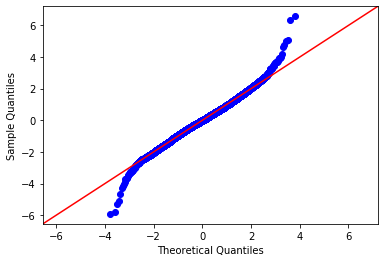

In [171]:
residuals = results.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

In [172]:
conda install -c conda-forge tensorflow

Solving environment: | 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/noarch::ipywidgets==7.5.0=py_0
  - defaults/osx-64::pytest-astropy==0.5.0=py37_0
  - defaults/osx-64::jupyter==1.0.0=py37_7
  - defaults/osx-64::scikit-image==0.15.0=py37h0a44026_0
  - defaults/osx-64::imageio==2.5.0=py37_0
  - defaults/noarch::anaconda-project==0.8.3=py_0
  - defaults/osx-64::matplotlib==3.1.0=py37h54f8f79_0
  - defaults/osx-64::pytest-arraydiff==0.3=py37h39e3cac_0
  - defaults/osx-64::terminado==0.8.2=py37_0
  - defaults/noarch::jupyterlab_server==1.0.0=py_0
  - defaults/osx-64::pytest-doctestplus==0.3.0=py37_0
  - defaults/osx-64::jupyterlab==1.0.2=py37hf63ae98_0
  - defaults/osx-64::notebook==6.0.0=py37_0
  - defaults/osx-64::anaconda-navigator==1.9.7=py37_0
  - defaults/osx-64::widgetsnbextension==3.5.0=py37_0
  - defaults/osx-64::jupyter_console==6.0.0=py37_0
  - defaults/osx-64::_anaconda_depends==20

In [173]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [174]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras import *
from keras.layers import LeakyReLU

In [175]:
regress_test.rename(columns = {'props':'PropNouns', 'mispelled': 'MISSPELLINGS'}, inplace = True) 
   

//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [176]:
word_matrix.head()

,00,000,00pm,046,101st,102,102nd,10535,10536,11,...,öand,öbut,öin,öitís,öour,öthen,öwhen,öyouödoing,öî,öîto
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [177]:
essay_data = regress_test.join(word_matrix)

In [178]:
essay_data.head()

,percentage_grade,stopwords,word_count,MISSPELLINGS,avg_word,PropNouns,punct,words_per_sent,00,000,...,öand,öbut,öin,öitís,öour,öthen,öwhen,öyouödoing,öî,öîto
0,0.666667,157,338,44,4.550296,4,37,30.727273,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.750000,175,419,42,4.463007,10,33,22.052632,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.583333,129,279,27,4.526882,7,23,18.600000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.833333,207,524,78,5.041985,40,46,21.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.666667,211,465,47,4.526882,4,45,15.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [179]:
thin_essay_data = essay_data[essay_data.columns[essay_data.sum() > 3.49]]

In [180]:
thin_essay_data.shape

(12976, 3027)

In [181]:
thin_essay_data.to_csv('thin_essay_data.csv')

In [292]:
pip install keras-tqdm

Note: you may need to restart the kernel to use updated packages.


In [357]:
from keras_tqdm import TQDMNotebookCallback
from keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [EarlyStopping(monitor='val_loss', patience=10),
            ModelCheckpoint(filepath='class_model.h5', monitor='val_loss', save_best_only=True),TQDMNotebookCallback()]

In [265]:
letter_grade_df= pd.read_csv('letter_grade_df.csv')

In [269]:
letter_grade_df.head()

,Unnamed: 0,percentage_grade,stopwords,word_count,MISSPELLINGS,avg_word,PropNouns,punct,words_per_sent,102,...,ìthe,ìthen,ìthere,ìthis,ìtownî,ìwhen,ìwide,ìwinter,ìyou,íí
0,0,D+,157,338,44,4.550296,4,37,30.727273,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,C,175,419,42,4.463007,10,33,22.052632,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,F,129,279,27,4.526882,7,23,18.600000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,B,207,524,78,5.041985,40,46,21.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,D+,211,465,47,4.526882,4,45,15.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [270]:
letter_grade_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [271]:
letter_grade_df.head()

,percentage_grade,stopwords,word_count,MISSPELLINGS,avg_word,PropNouns,punct,words_per_sent,102,12,...,ìthe,ìthen,ìthere,ìthis,ìtownî,ìwhen,ìwide,ìwinter,ìyou,íí
0,D+,157,338,44,4.550296,4,37,30.727273,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,C,175,419,42,4.463007,10,33,22.052632,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,F,129,279,27,4.526882,7,23,18.600000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,B,207,524,78,5.041985,40,46,21.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,D+,211,465,47,4.526882,4,45,15.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [281]:
dataset = letter_grade_df

In [282]:
X = dataset.drop(['percentage_grade'], axis=1)
y = dataset['percentage_grade']


In [283]:
X.shape

(12976, 3026)

In [289]:
y = pd.get_dummies(y)

In [290]:
y.shape

(12976, 12)

In [358]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25, stratify=y, random_state=33)

In [359]:
from keras.layers import Dropout

In [360]:
classmodel = Sequential()
classmodel.add(Dense(3000, input_dim=3026, kernel_initializer='normal',activation='relu', kernel_regularizer=regularizers.l2(0.1)))
classmodel.add(Dropout(.2))
classmodel.add(Dense(1500, kernel_initializer='normal', activation='relu'))
classmodel.add(Dropout(.1))
classmodel.add(Dense(375, kernel_initializer='normal', activation='relu'))
classmodel.add(Dense(12, kernel_initializer='normal', activation='softmax'))

In [361]:
classmodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [362]:
classmodel.fit(X_train,y_train, epochs=100, batch_size=12, validation_data=(X_test, y_test), verbose=2, callbacks=callbacks)

Train on 9732 samples, validate on 3244 samples


Epoch 1/100


 - 131s - loss: 228820.0510 - accuracy: 0.2212 - val_loss: 1240732.9595 - val_accuracy: 0.3715
Epoch 2/100


 - 132s - loss: 9324751.3225 - accuracy: 0.2126 - val_loss: 26741237.1517 - val_accuracy: 0.0388
Epoch 3/100


 - 130s - loss: 58703566.1413 - accuracy: 0.2074 - val_loss: 95226768.9199 - val_accuracy: 0.0080
Epoch 4/100


 - 131s - loss: 168635612.4966 - accuracy: 0.2172 - val_loss: 147269290.0746 - val_accuracy: 0.0388
Epoch 5/100


 - 141s - loss: 350279551.2078 - accuracy: 0.2204 - val_loss: 524436811.1369 - val_accuracy: 0.3715
Epoch 6/100


 - 156s - loss: 602163359.5413 - accuracy: 0.2203 - val_loss: 997748580.9420 - val_accuracy: 0.3715
Epoch 7/100


 - 155s - loss: 900630186.7744 - accuracy: 0.2165 - val_loss: 1129067151.0210 - val_accuracy: 0.2371
Epoch 8/100


 - 158s - loss: 1292717849.9482 - accuracy: 0.2180 - val_loss: 1374202753.2226 - val_accuracy: 0.2371
Epoch 9/100


 - 142s - loss: 1827452642.9519 - accuracy: 0.2110 - val_loss: 1149965209.5018 - val_accuracy: 0.2371
Epoch 10/100


 - 131s - loss: 2366870785.1492 - accuracy: 0.2203 - val_loss: 2418401049.5290 - val_accuracy: 0.3715
Epoch 11/100


KeyboardInterrupt: 

In [368]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn import tree 
from IPython.display import Image  
from sklearn.tree import export_graphviz

In [374]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25, stratify=y, random_state=33)

In [375]:
clf = DecisionTreeClassifier(random_state=101)

clf.fit(X_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=101, splitter='best')

In [376]:
y_pred = clf.predict(X_test)

In [379]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, auc

In [380]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5147965474722564


In [382]:
from sklearn.metrics import confusion_matrix

In [386]:
from sklearn.metrics import classification_report

In [390]:
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.23      0.21      0.22        43
           2       0.27      0.25      0.26       126
           3       0.11      0.12      0.11        17
           4       0.00      0.00      0.00        23
           5       0.51      0.50      0.51       472
           6       0.00      0.00      0.00         5
           7       0.09      0.08      0.08        50
           8       0.06      0.07      0.07        28
           9       0.50      0.50      0.50       769
          10       0.21      0.23      0.22        26
          11       0.65      0.65      0.65      1205

   micro avg       0.53      0.53      0.53      2777
   macro avg       0.22      0.22      0.22      2777
weighted avg       0.53      0.53      0.53      2777
 samples avg       0.45      0.45      0.45      2777



//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)


In [391]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [392]:
bagged_tree = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), n_estimators=20)

In [396]:
bagged_tree.fit(X_train, y_train)

ValueError: bad input shape (9732, 12)

In [395]:
bagged_tree.score(X_test, y_test)

NotFittedError: This BaggingClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [397]:
from keras_tqdm import TQDMNotebookCallback
from keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [EarlyStopping(monitor='val_loss', patience=10),
            ModelCheckpoint(filepath='bnn_model.h5', monitor='val_loss', save_best_only=True),TQDMNotebookCallback()]

In [190]:
from keras import initializers
from keras import regularizers
from keras import constraints

In [225]:
nnmodel = Sequential()
nnmodel.add(Dense(1512, input_dim=3026, kernel_initializer='normal',activation='relu', kernel_regularizer=regularizers.l2(0.1)))
nnmodel.add(Dense(756, kernel_initializer='normal', activation='relu'))
nnmodel.add(Dense(378, kernel_initializer='normal', activation='relu'))
nnmodel.add(Dense(1, kernel_initializer='normal', activation='linear'))

In [226]:
nnmodel.compile(loss='mean_squared_error', optimizer='adam')

In [235]:
nnmodel.fit(X_train,y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=2, callbacks=callbacks)

Train on 8304 samples, validate on 2596 samples


Epoch 1/100


KeyboardInterrupt: 

In [286]:
# def baseline_model():
#     # create model
#     model = Sequential()
#     model.add(Dense(4200, input_dim=4200, kernel_initializer='normal', activation='relu'))
#     model.add(Dense(1, kernel_initializer='normal'))
#     # Compile model
#     model.compile(loss='mean_squared_error', optimizer='adam')
#     return model

In [287]:
# estimator = KerasRegressor(build_fn=baseline_model, epochs=10, batch_size=128, verbose=2)
# kfold = KFold(n_splits=3)
# results = cross_val_score(estimator, XX, YY, cv=kfold)
# print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Epoch 1/10
 - 15s - loss: 170.0363
Epoch 2/10
 - 15s - loss: 0.3282
Epoch 3/10
 - 16s - loss: 0.1315
Epoch 4/10
 - 16s - loss: 0.0929
Epoch 5/10
 - 16s - loss: 0.0651
Epoch 6/10
 - 16s - loss: 0.0547
Epoch 7/10
 - 16s - loss: 0.0647
Epoch 8/10
 - 16s - loss: 0.0441
Epoch 9/10
 - 16s - loss: 0.0350
Epoch 10/10
 - 15s - loss: 0.0337
Epoch 1/10
 - 15s - loss: 488.7563
Epoch 2/10
 - 14s - loss: 6.6445
Epoch 3/10
 - 14s - loss: 12.1386
Epoch 4/10
 - 15s - loss: 5.0770
Epoch 5/10
 - 15s - loss: 3.5502
Epoch 6/10
 - 15s - loss: 1.6930
Epoch 7/10
 - 15s - loss: 1.0986
Epoch 8/10
 - 15s - loss: 1.3863
Epoch 9/10
 - 15s - loss: 1.9852
Epoch 10/10
 - 15s - loss: 2.3486
Epoch 1/10
 - 15s - loss: 335.8333
Epoch 2/10
 - 15s - loss: 7.1499
Epoch 3/10
 - 15s - loss: 5.1466
Epoch 4/10
 - 15s - loss: 5.1296
Epoch 5/10
 - 15s - loss: 7.8432
Epoch 6/10
 - 15s - loss: 6.8804
Epoch 7/10
 - 15s - loss: 6.7833
Epoch 8/10
 - 15s - loss: 6.2302
Epoch 9/10
 - 15s - loss: 5.2034
Epoch 10/10
 - 15s - loss: 4.8699


In [229]:
for layer in best_model.layers:
    if len(layer.weights) > 0:
        print(layer.name, layer.weights[0].shape)

dense_17 (3026, 1512)
dense_18 (1512, 756)
dense_19 (756, 378)
dense_20 (378, 1)


In [398]:
# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model
 
# load model
best_model = load_model('b_model.h5')
# summarize model.
best_model.summary()
# load dataset

X = dataset[:,1:3028]
y = dataset[:,0]
# evaluate the model
score = best_model.evaluate(X, y, verbose=2)
print("%s: %.2f%%" % (best_model.metrics_names, score*100))


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 1512)              4576824   
_________________________________________________________________
dense_18 (Dense)             (None, 756)               1143828   
_________________________________________________________________
dense_19 (Dense)             (None, 378)               286146    
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 379       
Total params: 6,007,177
Trainable params: 6,007,177
Non-trainable params: 0
_________________________________________________________________


TypeError: '(slice(None, None, None), slice(1, 3028, None))' is an invalid key

In [230]:
B_Input_Hidden = best_model.layers[0].get_weights()[1]
B_Output_Hidden = best_model.layers[1].get_weights()[1]

In [231]:
B_Input_Hidden

array([-0.00044954,  0.01783613, -0.03146923, ..., -0.01191104,
        0.03771259, -0.0008949 ], dtype=float32)

In [232]:
B_Output_Hidden

array([-2.08853800e-02,  1.75728593e-02, -3.73739749e-02, -6.78181797e-02,
       -4.01842371e-02, -7.92686567e-02, -3.72193493e-02,  1.90844480e-02,
       -7.74830356e-02, -3.96169871e-02, -3.06173675e-02, -3.26772295e-02,
       -2.88572237e-02, -5.61312512e-02, -6.94099069e-02, -1.89249273e-02,
        7.49459211e-03,  3.36612837e-04, -1.87271535e-02,  6.66327635e-03,
        4.73063625e-03, -1.44744590e-02, -1.18766204e-01, -3.55086885e-02,
       -4.15486321e-02, -3.75648104e-02,  1.37729598e-02, -2.90482193e-02,
       -4.15699631e-02,  2.06766720e-03, -4.84812818e-03, -5.81064336e-02,
       -3.17569971e-02, -1.54968593e-02, -4.44640331e-02, -8.98716152e-02,
       -3.16015519e-02,  3.36776376e-02, -7.77986273e-02, -3.37365419e-02,
       -2.21589487e-02, -3.77774388e-02, -3.21698189e-02, -3.01891472e-02,
       -2.83268113e-02, -6.58318251e-02, -6.11029239e-03,  4.79046814e-03,
       -5.05356006e-02, -7.38971159e-02, -1.49254398e-02, -4.37766351e-02,
       -4.04572599e-02, -

In [563]:
pip install streamlit

     |████████████████████████████████| 6.3MB 5.1MB/s eta 0:00:01
     |████████████████████████████████| 522kB 41.7MB/s eta 0:00:01
     |████████████████████████████████| 3.9MB 30.6MB/s eta 0:00:01
     |████████████████████████████████| 604kB 16.6MB/s eta 0:00:01
     |████████████████████████████████| 112kB 37.3MB/s eta 0:00:01
     |████████████████████████████████| 92kB 24.8MB/s eta 0:00:01
  Stored in directory: /Users/paulkruger/Library/Caches/pip/wheels/6d/e1/ce/f4ee2fa420cc6b940123c64992b81047816d0a9fad6b879325
  Stored in directory: /Users/paulkruger/Library/Caches/pip/wheels/52/ad/d4/c5ddfd117381a9c46fdc4a1d15eb688a81e6e821f5c69d9056
  Stored in directory: /Users/paulkruger/Library/Caches/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
  Stored in directory: /Users/paulkruger/Library/Caches/pip/wheels/61/1d/d0/04cfe495619be2095eb8d89a31c42adb4e42b76495bc8f784c
  Stored in directory: /Users/paulkruger/Library/Caches/pip/wheels/0b/04/79/c3b0c3a0266a3cb4

Note: you may need to restart the kernel to use updated packages.


In [1]:
import streamlit as st

# packages in environment at //anaconda3:
#
# Name                    Version                   Build  Channel
_anaconda_depends         2019.03                  py37_0  
_ipyw_jlab_nb_ext_conf    0.1.0                    py37_0  
_tflow_select             2.3.0                       mkl  
absl-py                   0.8.1                    py37_0    conda-forge
alabaster                 0.7.12                   py37_0  
altair                    3.3.0                    pypi_0    pypi
anaconda                  custom                   py37_1  
anaconda-client           1.7.2                    py37_0  
anaconda-navigator        1.9.7                    py37_0  
anaconda-project          0.8.3                      py_0  
appnope                   0.1.0                    py37_0  
appscript                 1.1.0            py37h1de35cc_0  
argh                      0.26.2                   pypi_0    pypi
asn1crypto                0.24.0                   py37_0  
astor                   

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=33)

In [259]:
BEST = best_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Train on 8304 samples, validate on 2076 samples
Epoch 1/10
8304/8304 [==============================] - 19s 2ms/step - loss: 0.0313 - val_loss: 0.0329
Epoch 2/10
8304/8304 [==============================] - 19s 2ms/step - loss: 0.0314 - val_loss: 0.0301
Epoch 3/10
8304/8304 [==============================] - 19s 2ms/step - loss: 0.0311 - val_loss: 0.0287
Epoch 4/10
8304/8304 [==============================] - 19s 2ms/step - loss: 0.0310 - val_loss: 0.0282
Epoch 5/10
8304/8304 [==============================] - 19s 2ms/step - loss: 0.0312 - val_loss: 0.0342
Epoch 6/10
8304/8304 [==============================] - 19s 2ms/step - loss: 0.0313 - val_loss: 0.0288
Epoch 7/10
8304/8304 [==============================] - 19s 2ms/step - loss: 0.0314 - val_loss: 0.0303
Epoch 8/10
8304/8304 [==============================] - 19s 2ms/step - loss: 0.0310 - val_loss: 0.0283
Epoch 9/10
8304/8304 [==============================] - 19s 2ms/step - loss: 0.0305 - val_loss: 0.0288
Epoch 10/10
8304/8304 [==

In [258]:
plt.plot(BEST.history['loss'])
plt.plot(BEST_model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

AttributeError: 'Sequential' object has no attribute 'history'

In [252]:
plt.plot(BEST.History['accuracy'])
plt.plot(bestest_NN.History['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

AttributeError: 'History' object has no attribute 'History'

In [255]:
bestest_NN



In [242]:
m = np.random.normal(scale=10)
b = np.random.normal(scale=10)

In [243]:
def plot_pred_line(X, y, m, b):
    
    # Generate a set of datapoints on x for creating a line.
    x_line = np.linspace(np.min(X), np.max(X), 10)

    # Calculate the corresponding y with random values of m & b
    y_line = m * x_line + b
    
    dataset = {'X': X, 'y': y}
    
    pred_line = {'x_line': x_line, 'y_line':y_line}
    
    plot_graph(dataset, pred_line)
    
    return

In [245]:
def plot_graph(X, y):
    
    # Plot the original set of datapoints
    _ = plt.scatter(X, y, alpha=0.8)
    
    _ = plt.title('Plot of Datapoints generated')
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

    plt.show()

TypeError: float() argument must be a string or a number, not 'dict'

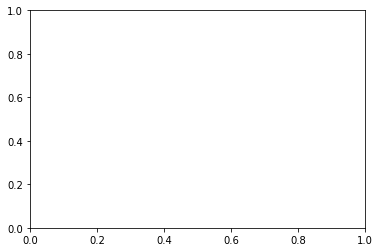

In [246]:
plot_pred_line(X_train, y_train, m, b)

In [261]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [263]:
from keras.utils import plot_model
plot_model(BEST,expand_nested=True,show_shapes=True)

ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.